In [16]:
from experiment_manager.inspect_results import get_results_table
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk 
import sklearn.metrics as metrics
import random

df = get_results_table("C:/Users/b_charmettant/logs/brightness_aug/convnet_lr1e-05_e2000_bs30_ps0.4_s40_r0.02/predictions_lytix/")
df_val = df.loc[df.subset == 'val']
df_train = df.loc[df.subset == 'train']

#df_val = df_val.loc[df_val.patient != 'immuno_30']
#new_preds = list(df_val.loc[df_val.patient == 'immuno_30']['pred'].apply(lambda x: str(1-float(x))))
#df_val.loc[df_val.patient == 'immuno_30', 'pred'] = new_preds

print(df_val.head(2))


print(sum(df_val['label'].astype(float)) / len(df_val))

  pos_0 pos_1                pred label subset    patient     nom_image
0   382   143  0.5996025204658508     0    val  immuno_24  ex1_cible1_a
1   380   178  0.7696213722229004     0    val  immuno_24  ex1_cible1_a
0.6456953642384106


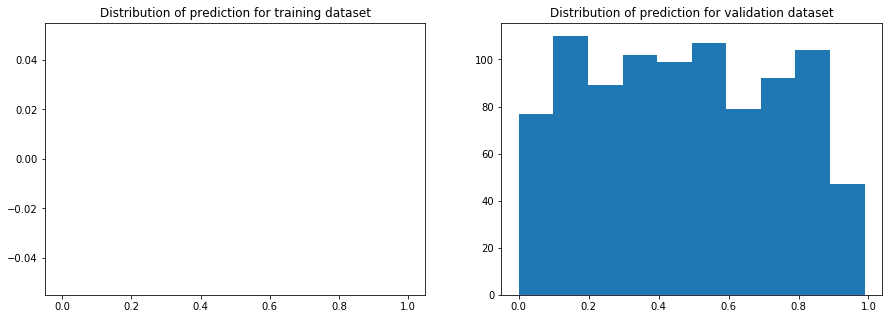

In [17]:
plt.rcParams['figure.figsize'] = [15, 5]

fig, axis = plt.subplots(1,2)
axis[0].hist(df_train['pred'].astype(float))
axis[0].set_title("Distribution of prediction for training dataset")
axis[1].hist(df_val['pred'].astype(float))
axis[1].set_title("Distribution of prediction for validation dataset")
plt.show()

In [18]:
def get_random_pred(p, nb):
    ls = []
    for i in range(nb):
        if random.random() < p:
            ls.append(1)
        else:
            ls.append(0)
    return ls

- AUC : 0.508


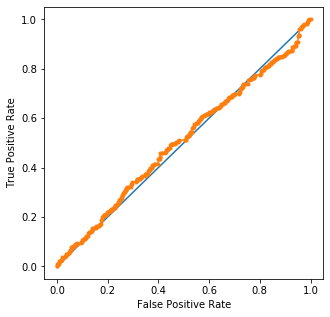

Threshold : 0.350 - Accuracy : 0.545


In [19]:
plt.rcParams['figure.figsize'] = [5, 5]

val_logits = df_val['pred'].astype(float)
val_labels = df_val['label'].astype(float)


fpr, tpr, thresholds = metrics.roc_curve(val_labels, val_logits)
auc = metrics.roc_auc_score(val_labels, val_logits)

print("- AUC : {:.3f}".format(auc))

plt.plot(fpr, fpr)
plt.plot(fpr, tpr, marker='.')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the plot
plt.show()

for t in [0.35]:
    preds = (np.array(val_logits) > t).astype(np.int32)
    acc = sk.metrics.accuracy_score(val_labels, preds)
    
    print("Threshold : {:.3f} - Accuracy : {:.3f}".format(t, acc))



immuno_24 - AUC : 0.670


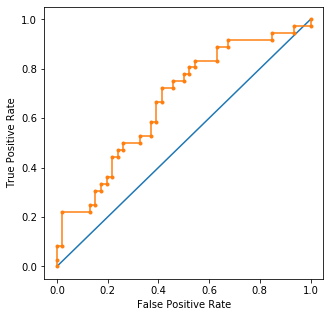

immuno_26 - AUC : 0.635


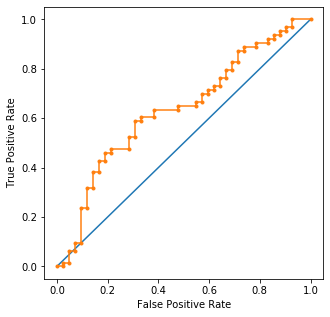

immuno_30 - AUC : 0.407


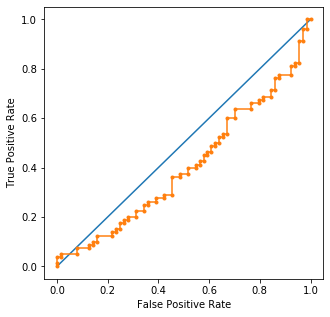

immuno_32 - AUC : 0.561


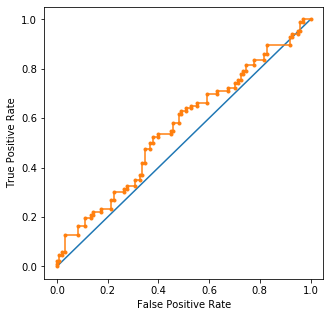

immuno_33 - AUC : 0.559


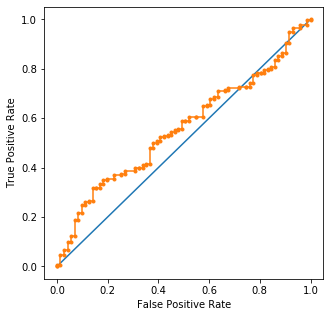

In [20]:
patients = sorted(list(set(df_val['patient'])))
plt.rcParams['figure.figsize'] = [5, 5]

for p in patients:
    df_patient = df_val.loc[df_val.patient == p]
    val_logits = df_patient['pred'].astype(float)
    val_labels = df_patient['label'].astype(float)


    fpr, tpr, thresholds = metrics.roc_curve(val_labels, val_logits)
    auc = metrics.roc_auc_score(val_labels, val_logits)

    print("{} - AUC : {:.3f}".format(p, auc))

    plt.plot(fpr, fpr)
    plt.plot(fpr, tpr, marker='.')

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # show the plot
    plt.show()

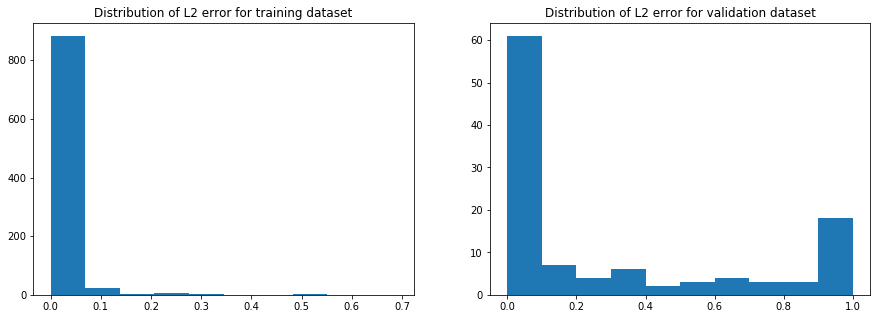

In [79]:
plt.rcParams['figure.figsize'] = [15, 5]

fig, axis = plt.subplots(1,2)
axis[0].hist(np.square(df_train['pred'].astype(float) - df_train['label'].astype(float)))
axis[0].set_title("Distribution of L2 error for training dataset")
axis[1].hist(np.square(df_val['pred'].astype(float) - df_val['label'].astype(float)))
axis[1].set_title("Distribution of L2 error for validation dataset")
plt.show()

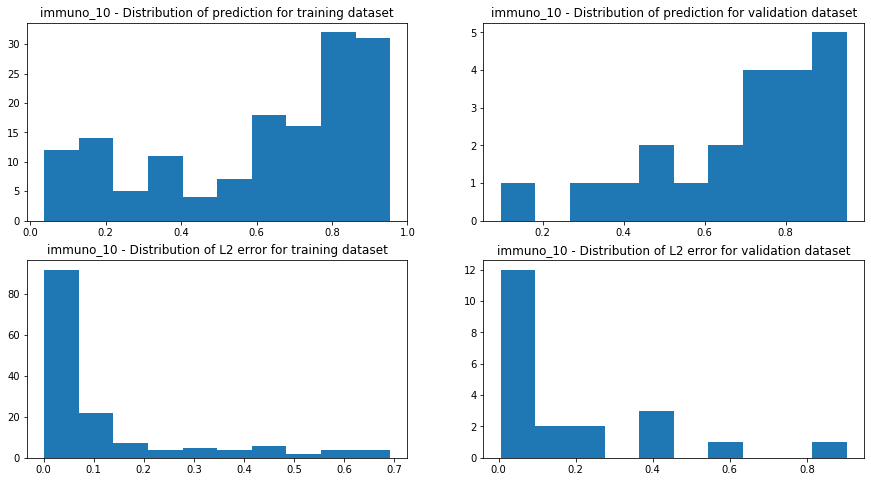

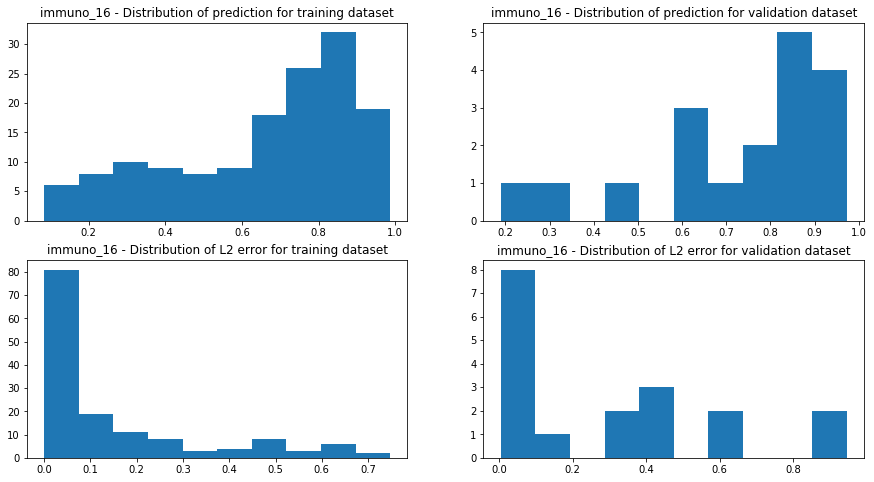

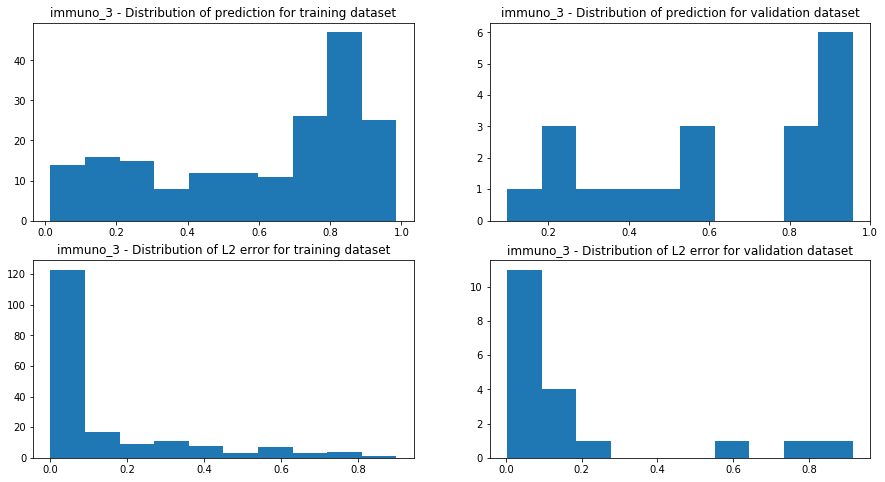

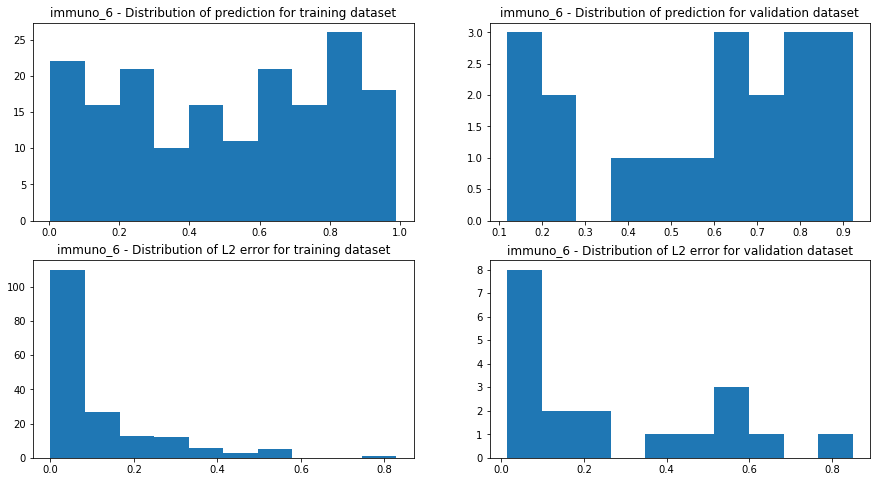

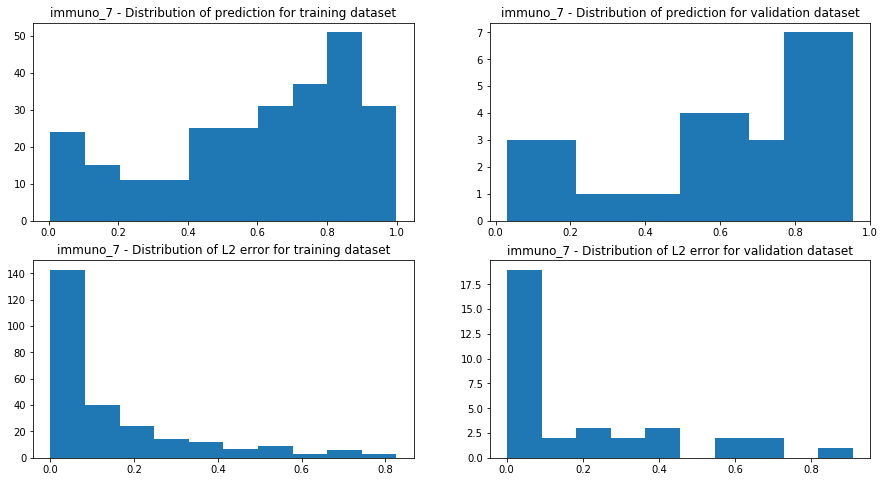

In [11]:
patients = sorted(list(set(df['patient'])))
plt.rcParams['figure.figsize'] = [15, 8]

for p in patients:
    df_p_train = df_train.loc[df_train.patient == p]
    df_p_val = df_val .loc[df_val.patient == p]
    fig, axis = plt.subplots(2,2)
    axis[0][0].hist(df_p_train['pred'].astype(float))
    axis[0][0].set_title(f"{p} - Distribution of prediction for training dataset")
    axis[0][1].hist(df_p_val['pred'].astype(float))
    axis[0][1].set_title(f"{p} - Distribution of prediction for validation dataset")
    
    axis[1][0].hist(np.square(df_p_train['pred'].astype(float) - df_p_train['label'].astype(float)))
    axis[1][0].set_title(f"{p} - Distribution of L2 error for training dataset")
    axis[1][1].hist(np.square(df_p_val['pred'].astype(float) - df_p_val['label'].astype(float)))
    axis[1][1].set_title(f"{p} - Distribution of L2 error for validation dataset")
    plt.show()
    
    

In [20]:
a = df.loc[df.pred == str(0.7902421951293945)]['subset']


In [26]:
a[0]

'train'

In [35]:
b = [1, 3]
b.append(None)
b.append(10)
print(b)

[1, 3, None, 10]


In [36]:
len(b)

4

In [37]:
df

,pos_0,pos_1,pred,label,subset,patient,exam
0,367,171,0.7902421951293945,0,train,immuno_10,pred_ex1_cible1_a
1,324,224,0.3178465962409973,0,train,immuno_10,pred_ex1_cible1_a
2,342,324,0.5268571972846985,0,train,immuno_10,pred_ex1_cible1_a
3,410,365,0.38025549054145813,0,train,immuno_10,pred_ex1_cible1_a
4,538,355,0.5633209943771362,0,train,immuno_10,pred_ex1_cible1_a
...,...,...,...,...,...,...,...
20,550,75,0.272798627614975,1,train,immuno_7,pred_ex6_cible3_b
21,502,69,0.8108251690864563,1,train,immuno_7,pred_ex6_cible3_b
22,461,72,0.9757760167121887,1,train,immuno_7,pred_ex6_cible3_b
23,412,74,0.8286159634590149,1,train,immuno_7,pred_ex6_cible3_b


In [38]:
df.loc[df.patient == 'lol']

,pos_0,pos_1,pred,label,subset,patient,exam
